# Importação dos dados



In [95]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [96]:
#Criando o dataset único que vou usar para as análises

#Criando colunas que identificam a loja em cada dataset
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

lojas = pd.concat([loja, loja2, loja3, loja4])

In [97]:
lojas.shape

(9435, 13)

## Distribuição dos dados

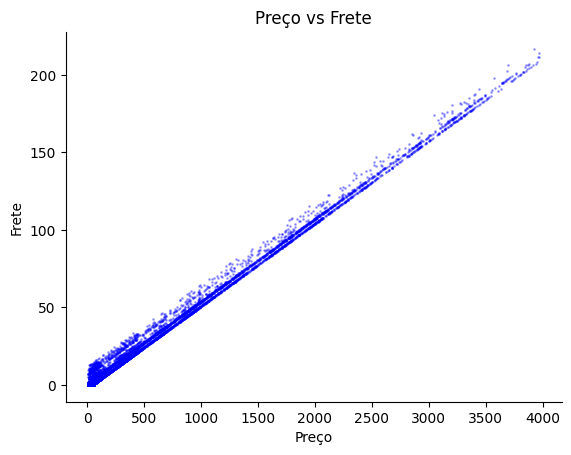

In [98]:
# @title Preço vs Frete

from matplotlib import pyplot as plt
lojas.plot(kind='scatter', x='Preço', y='Frete', s=1, alpha=.3, color='blue')
plt.title('Preço vs Frete')
plt.xlabel('Preço')
plt.ylabel('Frete')
plt.gca().spines[['top', 'right',]].set_visible(False)

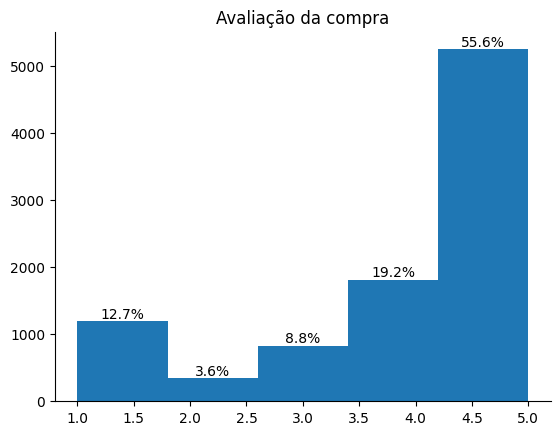

In [99]:
# @title Avaliação da compra

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the counts and percentages for each bin
counts, bins, patches = plt.hist(lojas['Avaliação da compra'], bins=5)
total_count = counts.sum()
percentages = (counts / total_count) * 100

# Add percentages to the top of each bar
for patch, percentage in zip(patches, percentages):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Avaliação da compra')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

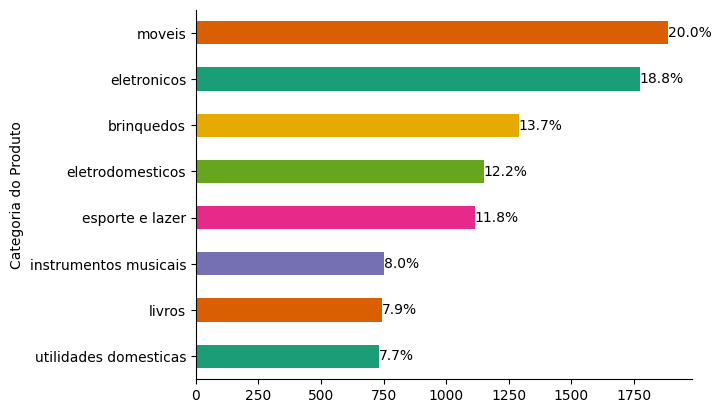

In [100]:
# @title Categoria do Produto

from matplotlib import pyplot as plt
import seaborn as sns

# Calculate the counts and sort them
category_counts = lojas.groupby('Categoria do Produto').size().sort_values(ascending=True)

# Calculate the percentages
total_count = category_counts.sum()
percentages = (category_counts / total_count) * 100

# Create the horizontal bar plot
ax = category_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Add percentages to the end of each bar
for i, v in enumerate(category_counts):
    ax.text(v, i, f'{percentages.iloc[i]:.1f}%', va='center')

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

/tmp/ipython-input-101-2155330844.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(loja, x='Preço', y='Categoria do Produto', inner='box', palette='Dark2', order=loja.groupby('Categoria do Produto')['Preço'].median().sort_values().index)


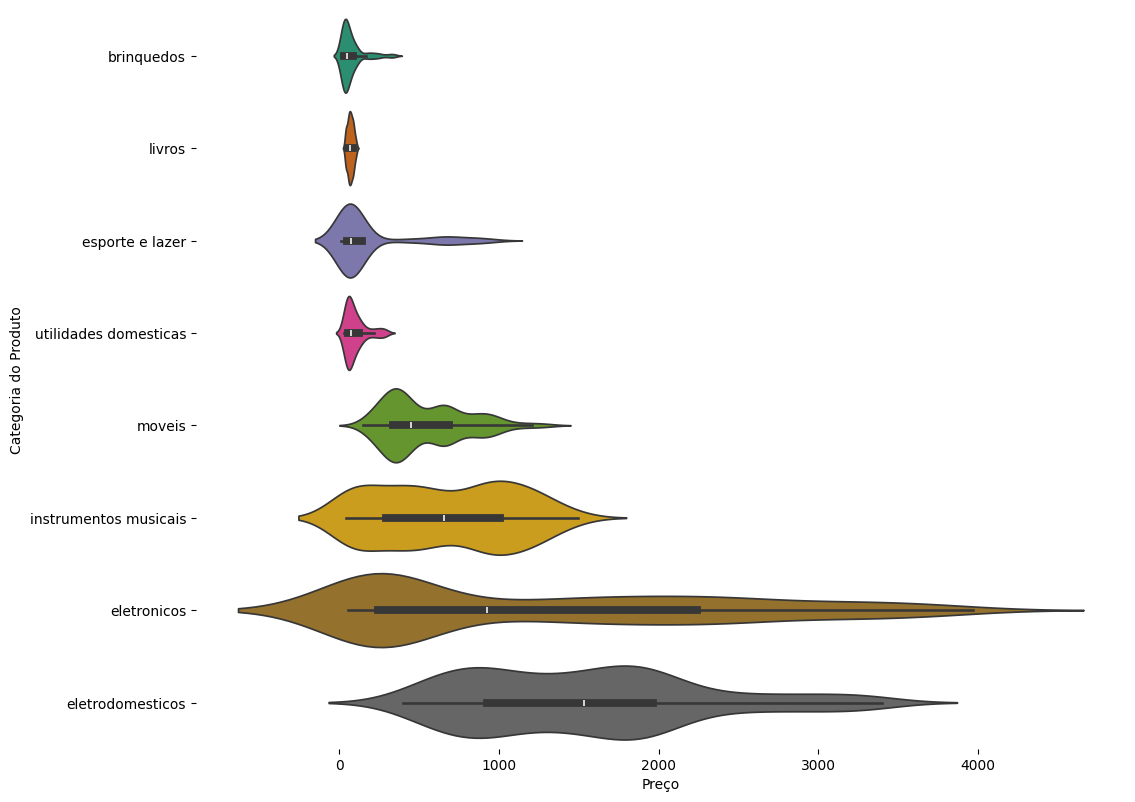

In [101]:
# @title Categoria do Produto vs Preço

from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(lojas['Categoria do Produto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(loja, x='Preço', y='Categoria do Produto', inner='box', palette='Dark2', order=loja.groupby('Categoria do Produto')['Preço'].median().sort_values().index)
sns.despine(top=True, right=True, bottom=True, left=True)

#1. Análise do faturamento


Faturamento acumulado da loja 1: 1534509.120000001
Faturamento acumulado da loja 2: 1488459.059999997
Faturamento acumulado da loja 3: 1464025.0300000003
Faturamento acumulado da loja 4: 1384497.5800000026


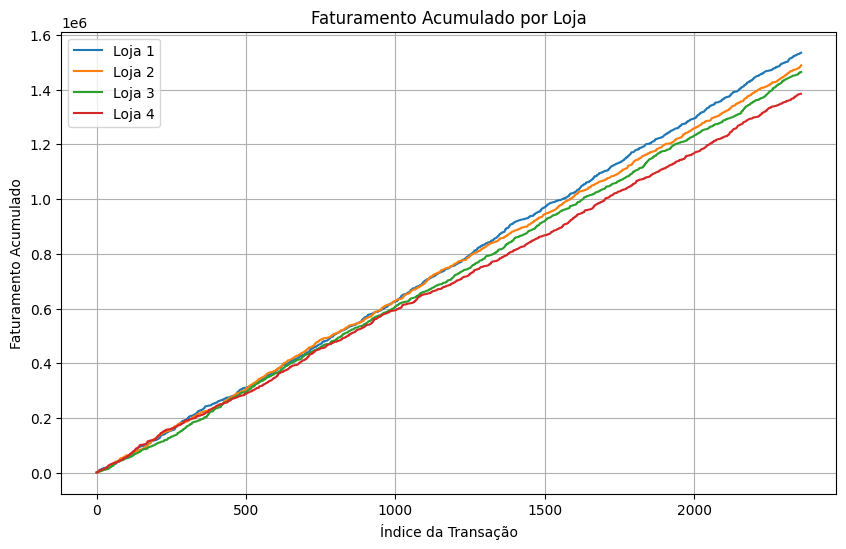

In [102]:
# @title Acumulado do faturamento

# Calculando o faturamento acumulado de cada Loja
loja['Faturamento_Acumulado'] = loja['Preço'].cumsum()
loja2['Faturamento_Acumulado'] = loja2['Preço'].cumsum()
loja3['Faturamento_Acumulado'] = loja3['Preço'].cumsum()
loja4['Faturamento_Acumulado'] = loja4['Preço'].cumsum()

print("Faturamento acumulado da loja 1:", loja['Faturamento_Acumulado'].iloc[-1])
print("Faturamento acumulado da loja 2:", loja2['Faturamento_Acumulado'].iloc[-1])
print("Faturamento acumulado da loja 3:", loja3['Faturamento_Acumulado'].iloc[-1])
print("Faturamento acumulado da loja 4:", loja4['Faturamento_Acumulado'].iloc[-1])

# Plotando o faturamento acumulado ao longo do tempo (assumindo que a ordem no DataFrame é temporal)
plt.figure(figsize=(10, 6))
plt.plot(loja['Faturamento_Acumulado'], label='Loja 1')
plt.plot(loja2['Faturamento_Acumulado'], label='Loja 2')
plt.plot(loja3['Faturamento_Acumulado'], label='Loja 3')
plt.plot(loja4['Faturamento_Acumulado'], label='Loja 4')

plt.title('Faturamento Acumulado por Loja')
plt.xlabel('Índice da Transação')
plt.ylabel('Faturamento Acumulado')
plt.legend()
plt.grid(True)
plt.show()

# 2. Vendas por Categoria


Categorias de Produto - Loja 1


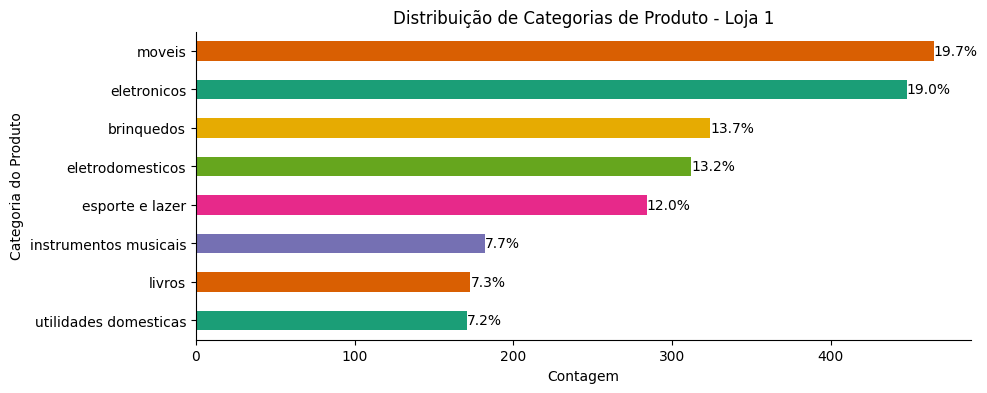

Categorias de Produto - Loja 2


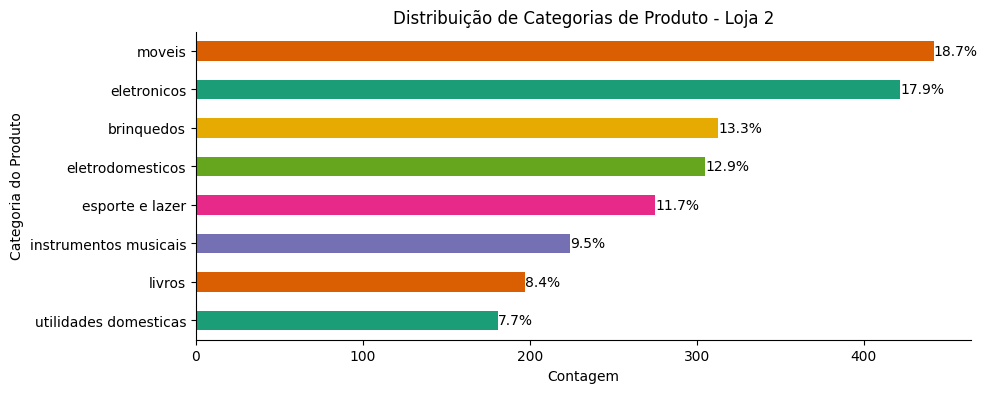

Categorias de Produto - Loja 3


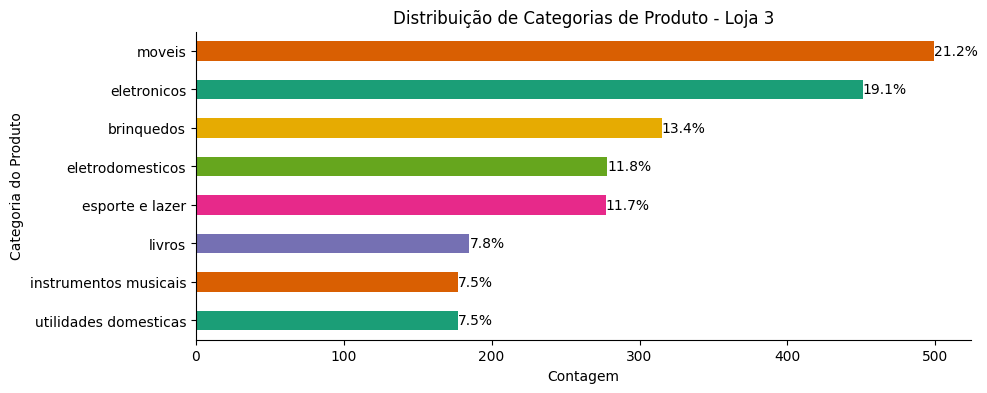

Categorias de Produto - Loja 4


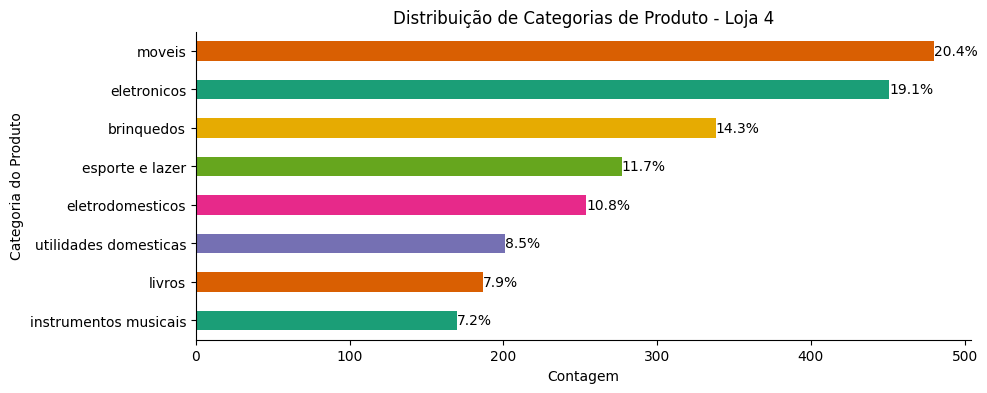

In [103]:
stores = {'Loja 1': loja, 'Loja 2': loja2, 'Loja 3': loja3, 'Loja 4': loja4}

for store_name, store_df in stores.items():
    print(f"Categorias de Produto - {store_name}")
    # Calculate the counts and sort them
    category_counts = store_df.groupby('Categoria do Produto').size().sort_values(ascending=True)

    # Calculate the percentages
    total_count = category_counts.sum()
    percentages = (category_counts / total_count) * 100

    # Create the horizontal bar plot
    ax = category_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), figsize=(10, len(category_counts) * 0.5))

    # Add percentages to the end of each bar
    for i, v in enumerate(category_counts):
        ax.text(v, i, f'{percentages.iloc[i]:.1f}%', va='center')

    plt.title(f'Distribuição de Categorias de Produto - {store_name}')
    plt.xlabel('Contagem')
    plt.ylabel('Categoria do Produto')
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

# 3. Média de Avaliação das Lojas

In [104]:
#Calculando a média de avaliação de cada Loja
print("Média de avaliação da loja 1:",loja['Avaliação da compra'].mean())
print("Média de avaliação da loja 2:",loja2['Avaliação da compra'].mean())
print("Média de avaliação da loja 3:",loja3['Avaliação da compra'].mean())
print("Média de avaliação da loja 4:",loja4['Avaliação da compra'].mean())

Média de avaliação da loja 1: 3.976685036032217
Média de avaliação da loja 2: 4.037303942348453
Média de avaliação da loja 3: 4.048325561678677
Média de avaliação da loja 4: 3.9957591178965224


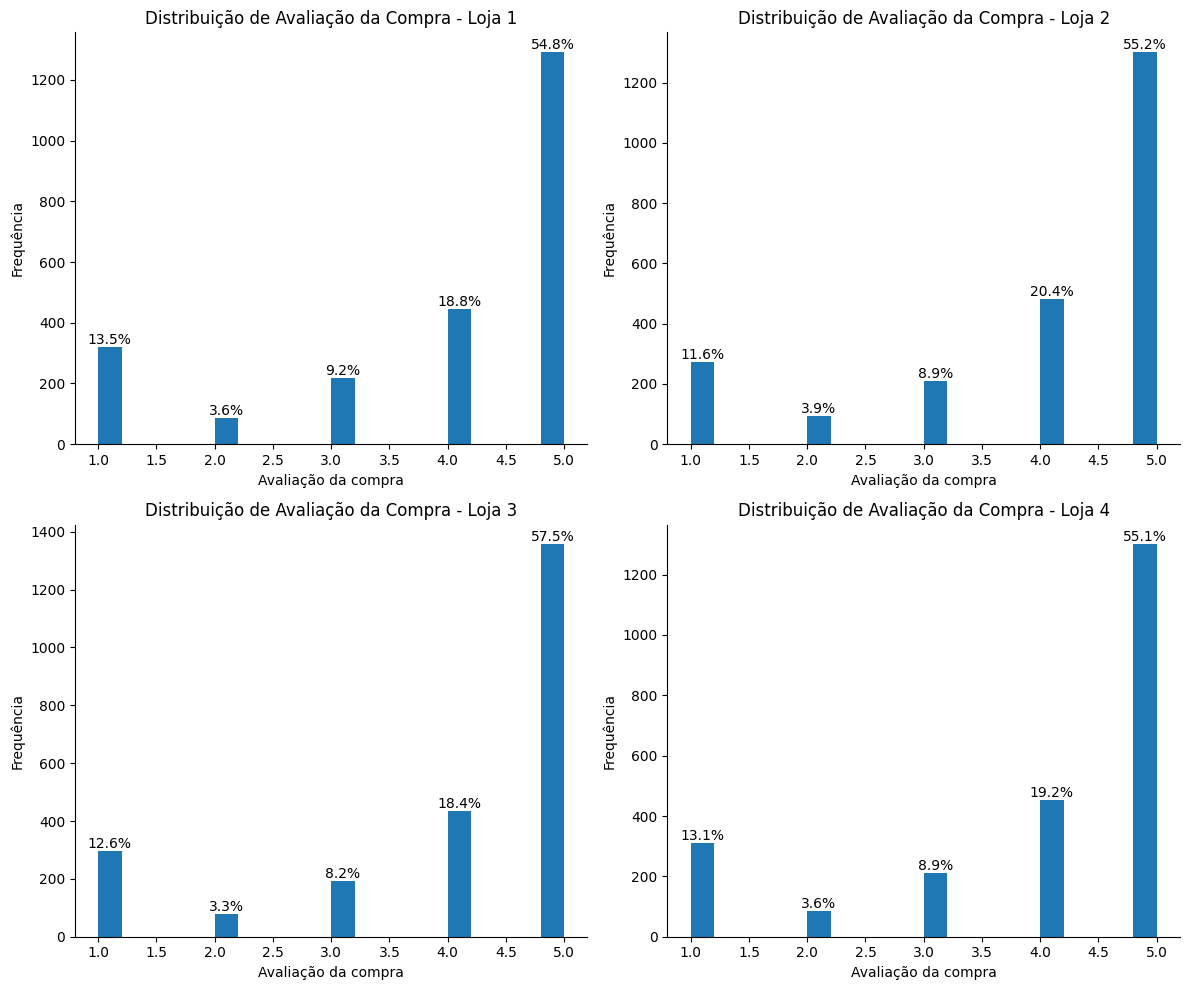

In [105]:
# @title Avaliação da compra por Loja

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

stores = {'Loja 1': loja, 'Loja 2': loja2, 'Loja 3': loja3, 'Loja 4': loja4}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

for i, (store_name, store_df) in enumerate(stores.items()):
    ax = axes[i]
    # Calculate the counts and percentages for each bin
    counts, bins, patches = ax.hist(store_df['Avaliação da compra'], bins=20)
    total_count = counts.sum()
    percentages = (counts / total_count) * 100

    # Add percentages to the top of each bar where the count is greater than 0
    for patch, percentage, count in zip(patches, percentages, counts):
        if count > 0:
            height = patch.get_height()
            ax.text(patch.get_x() + patch.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom')

    ax.set_title(f'Distribuição de Avaliação da Compra - {store_name}')
    ax.set_xlabel('Avaliação da compra')
    ax.set_ylabel('Frequência')
    ax.spines[['top', 'right',]].set_visible(False)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

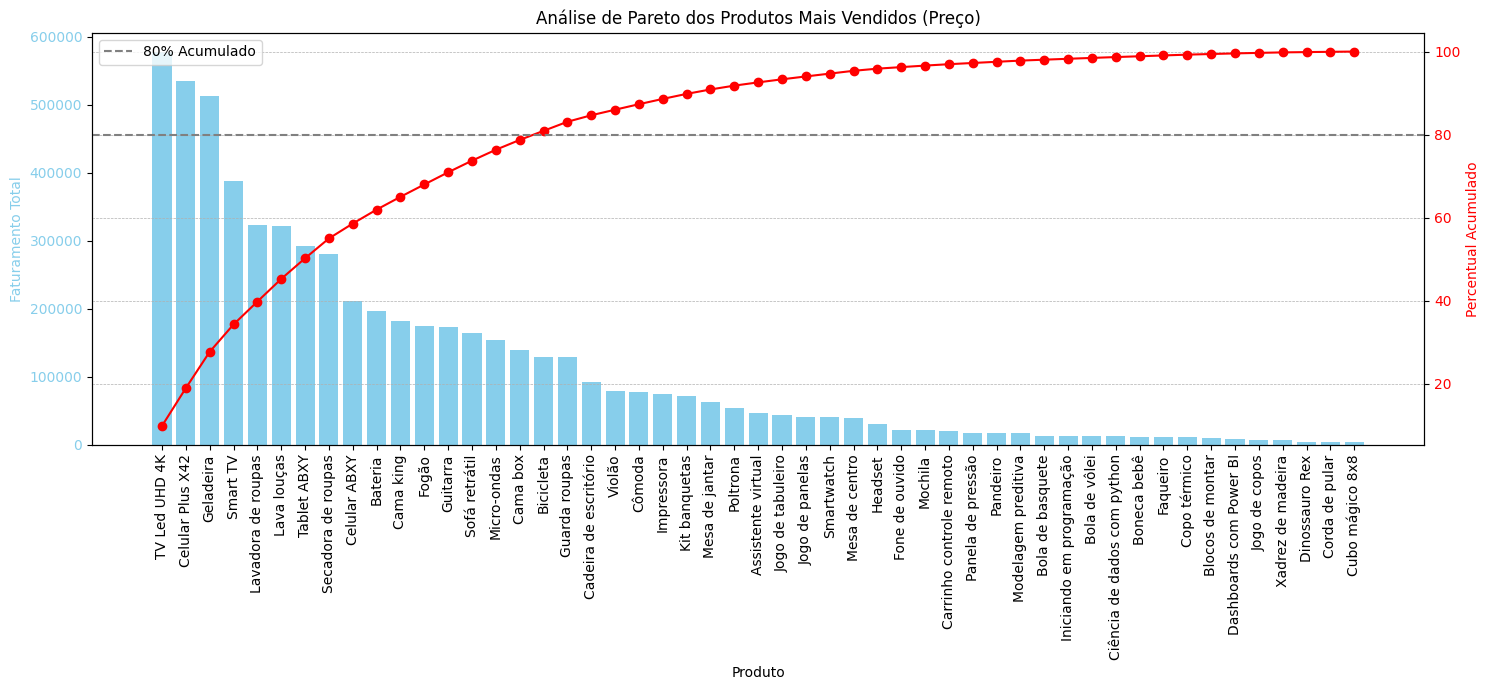


Produtos que representam aproximadamente 80% do faturamento total:
                        Sales  Percentage  Cumulative Percentage
Produto                                                         
TV Led UHD 4K       576652.70    9.821231               9.821231
Celular Plus X42    534735.14    9.107315              18.928546
Geladeira           513249.34    8.741380              27.669926
Smart TV            386963.12    6.590543              34.260469
Lavadora de roupas  323292.37    5.506138              39.766607
Lava louças         320715.58    5.462251              45.228858
Tablet ABXY         292016.76    4.973469              50.202327
Secadora de roupas  280317.31    4.774210              54.976537
Celular ABXY        210547.77    3.585934              58.562471
Bateria             197074.45    3.356464              61.918935
Cama king           181040.36    3.083380              65.002314
Fogão               174495.19    2.971906              67.974220
Guitarra            17

,Sales,Percentage,Cumulative Percentage
Produto,,,
Bicicleta,128648.29,2.191067,80.894698
Guarda roupas,128328.09,2.185613,83.080312
Cadeira de escritório,92132.31,1.569147,84.649459
Violão,78530.63,1.337490,85.986949
Cômoda,77892.33,1.326619,87.313568
Impressora,74969.03,1.276831,88.590400
Kit banquetas,71045.78,1.210013,89.800412
Mesa de jantar,62420.90,1.063118,90.863531
Poltrona,54395.35,0.926432,91.789962


In [106]:
# Calculate the total sales per product across all stores
product_sales = lojas.groupby('Produto')['Preço'].sum().sort_values(ascending=False)

# Calculate the cumulative sum and total sum for Pareto analysis
cumulative_sales = product_sales.cumsum()
total_sales = product_sales.sum()

# Calculate the percentage of total sales for each product and cumulative percentage
percentage_of_total = (product_sales / total_sales) * 100
cumulative_percentage = (cumulative_sales / total_sales) * 100

# Create a DataFrame for plotting
pareto_df = pd.DataFrame({'Sales': product_sales,
                          'Percentage': percentage_of_total,
                          'Cumulative Percentage': cumulative_percentage})

# Find the index where the cumulative percentage reaches approximately 80%
pareto_80_index = pareto_df[pareto_df['Cumulative Percentage'] <= 80].index
pareto_20_index = pareto_df[pareto_df['Cumulative Percentage'] > 80].index

# Plotting the Pareto chart
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar plot for individual product sales
ax1.bar(pareto_df.index, pareto_df['Sales'], color='skyblue')
ax1.set_xlabel('Produto')
ax1.set_ylabel('Faturamento Total', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=90)

# Create a secondary y-axis for the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(pareto_df.index, pareto_df['Cumulative Percentage'], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Percentual Acumulado', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a line at 80% cumulative percentage
ax2.axhline(y=80, color='gray', linestyle='--', label='80% Acumulado')
ax2.legend()

plt.title('Análise de Pareto dos Produtos Mais Vendidos (Preço)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add shaded area for the 80% products (optional, can make the plot busy)
# ax1.fill_between(pareto_df.index, pareto_df['Sales'], color='skyblue', alpha=0.3, where=[x in pareto_80_index for x in pareto_df.index])

# Improve layout and display the plot
plt.tight_layout()
plt.show()

# Display the products that make up the top 80% of revenue
print("\nProdutos que representam aproximadamente 80% do faturamento total:")
print(pareto_df.loc[pareto_80_index])

print("\nProdutos que representam aproximadamente 20% do faturamento total:")
pareto_df.loc[pareto_20_index]

# 5. Frete Médio por Loja


In [107]:
print("Frete médio da loja 1:",loja['Frete'].mean())
print("Frete médio da loja 2:",loja2['Frete'].mean())
print("Frete médio da loja 3:",loja3['Frete'].mean())
print("Frete médio da loja 4:",loja4['Frete'].mean())

Frete médio da loja 1: 34.69180491551149
Frete médio da loja 2: 33.62194065817927
Frete médio da loja 3: 33.07446427411743
Frete médio da loja 4: 31.278997081841727


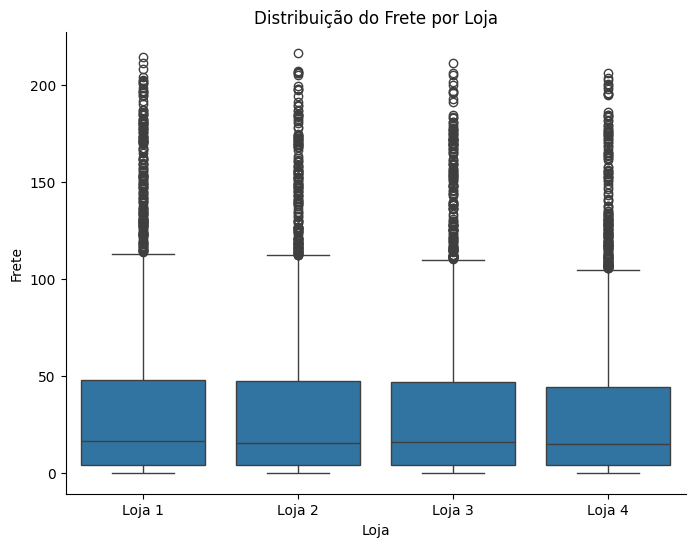

In [108]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loja', y='Frete', data=lojas)
plt.title('Distribuição do Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

#Gráficos


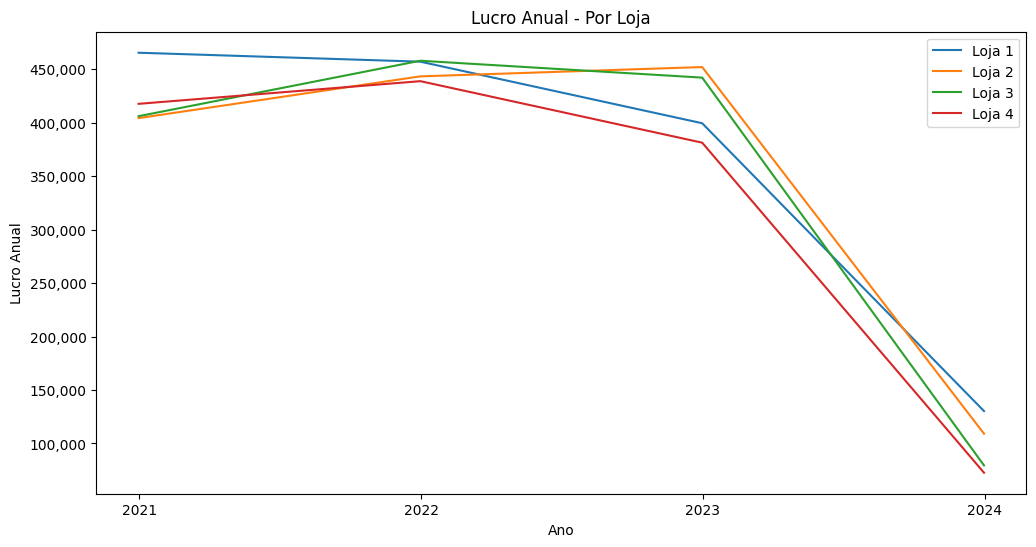

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

# Lista com os DataFrames das lojas
lojas_list = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(12, 6))

for i, df in enumerate(lojas_list):
    df = df.copy()
    df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], format='%d/%m/%Y')
    df['Preco - Frete'] = df['Preço'] - df['Frete']

    # Agrupar por ano e calcular somatório
    df_anual = df.resample('YE', on='Data da Compra')['Preco - Frete'].sum()

    plt.plot(df_anual.index, df_anual.values, label=nomes_lojas[i])

plt.xlabel('Ano')
plt.ylabel('Lucro Anual')
plt.title('Lucro Anual - Por Loja')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

# Relatório de Análise Exploratória de Dados: Avaliação de Desempenho das Lojas do Cliente João

## 1. Introdução

O presente relatório tem como objetivo apoiar o cliente João na tomada de decisão estratégica sobre a **possível venda de uma de suas quatro lojas**. Com base em dados históricos de vendas e comportamento dos consumidores, o desafio proposto é identificar qual das lojas apresenta o **pior desempenho ao longo dos últimos quatro anos**.

A **solução ideal** é aquela que consiga, com base em evidências, recomendar a venda da loja menos rentável sem comprometer a operação como um todo. Para isso, é essencial considerar tanto métricas quantitativas (como faturamento e lucro), quanto qualitativas (como a avaliação dos clientes).

## 2. Metodologia

A análise foi conduzida por meio da **exploração e visualização de dados**, avaliando separadamente o desempenho das quatro lojas em relação às seguintes variáveis:

* **Faturamento** (com base no preço dos produtos vendidos, subtraído do frete);
* **Categorias mais vendidas**;
* **Avaliação dos clientes**;
* **Produtos mais vendidos**;
* **Frete médio**.

Além disso, foi realizada uma análise do **lucro acumulado por ano**, que servirá como principal indicador para a recomendação final, visto que representa diretamente a saúde financeira de cada loja.

---

## 3. Análise por Variável




3.1 Faturamento (Lucro Operacional)
O lucro foi calculado subtraindo o valor do frete do preço de cada venda. Ao agrupar os dados por ano, observamos que a Loja 4 apresenta consistentemente os menores lucros ao longo de todos os quatro anos analisados. Já as demais lojas apresentam desempenho superior.

Essa métrica é central para a decisão, pois representa diretamente a capacidade da loja de gerar valor líquido.

Faturamento acumulado da loja 1: 1534509.120000001
Faturamento acumulado da loja 2: 1488459.059999997
Faturamento acumulado da loja 3: 1464025.0300000003
Faturamento acumulado da loja 4: 1384497.5800000026


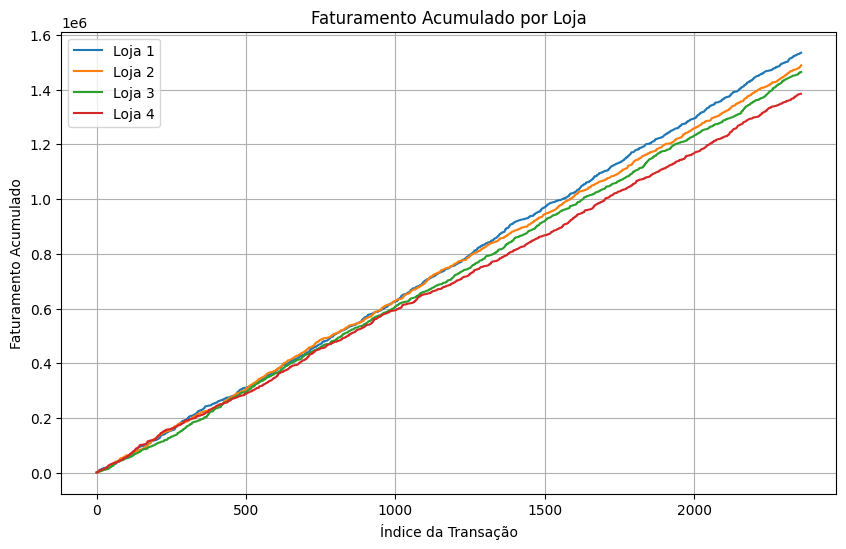

In [110]:
# @title Acumulado do faturamento

# Calculando o faturamento acumulado de cada Loja
loja['Faturamento_Acumulado'] = loja['Preço'].cumsum()
loja2['Faturamento_Acumulado'] = loja2['Preço'].cumsum()
loja3['Faturamento_Acumulado'] = loja3['Preço'].cumsum()
loja4['Faturamento_Acumulado'] = loja4['Preço'].cumsum()

print("Faturamento acumulado da loja 1:", loja['Faturamento_Acumulado'].iloc[-1])
print("Faturamento acumulado da loja 2:", loja2['Faturamento_Acumulado'].iloc[-1])
print("Faturamento acumulado da loja 3:", loja3['Faturamento_Acumulado'].iloc[-1])
print("Faturamento acumulado da loja 4:", loja4['Faturamento_Acumulado'].iloc[-1])

# Plotando o faturamento acumulado ao longo do tempo (assumindo que a ordem no DataFrame é temporal)
plt.figure(figsize=(10, 6))
plt.plot(loja['Faturamento_Acumulado'], label='Loja 1')
plt.plot(loja2['Faturamento_Acumulado'], label='Loja 2')
plt.plot(loja3['Faturamento_Acumulado'], label='Loja 3')
plt.plot(loja4['Faturamento_Acumulado'], label='Loja 4')

plt.title('Faturamento Acumulado por Loja')
plt.xlabel('Índice da Transação')
plt.ylabel('Faturamento Acumulado')
plt.legend()
plt.grid(True)
plt.show()

3.2 Categorias Mais Vendidas
A distribuição das categorias de produtos vendidos é bastante semelhante entre as quatro lojas. Todas elas concentram vendas em categorias específicas com pouca variação entre os estabelecimentos. Não foram encontradas evidências de que alguma loja esteja vendendo significativamente menos de uma categoria relevante.

Categorias de Produto - Loja 1


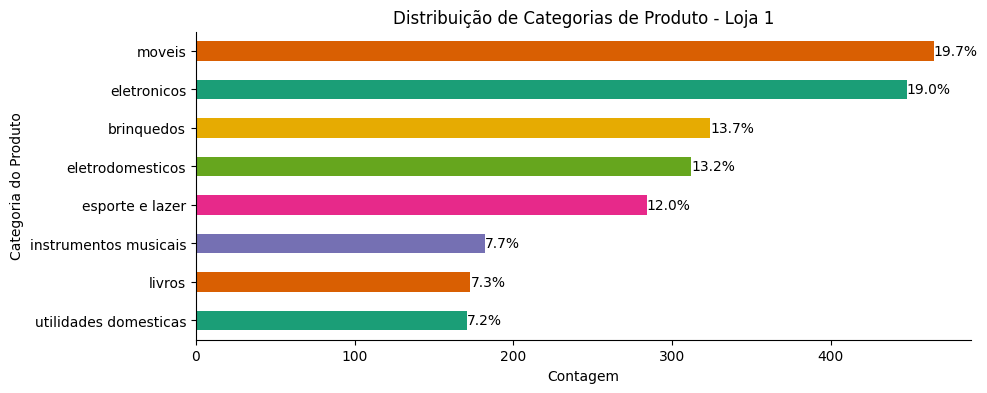

Categorias de Produto - Loja 2


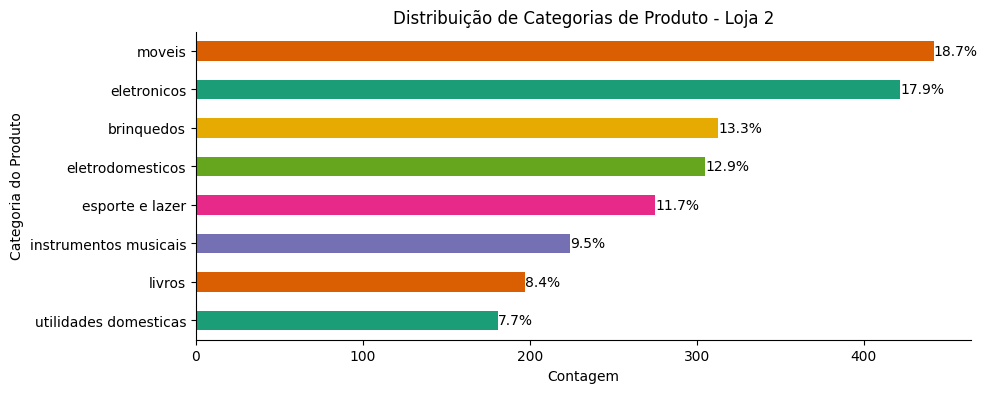

Categorias de Produto - Loja 3


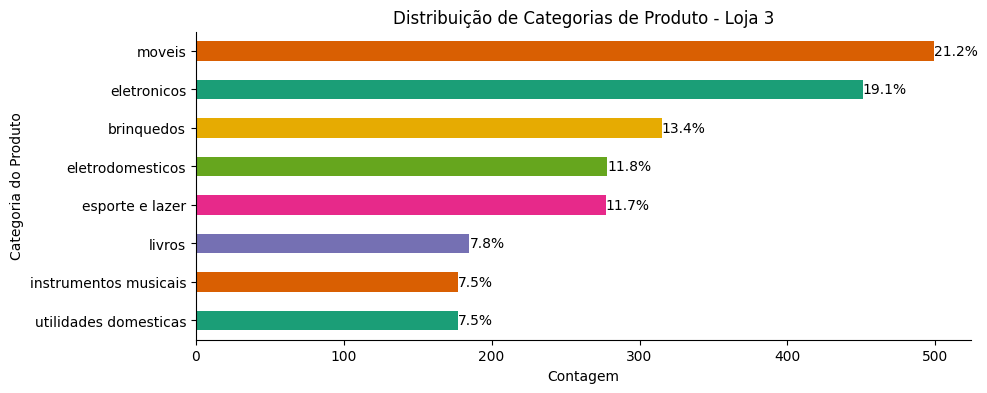

Categorias de Produto - Loja 4


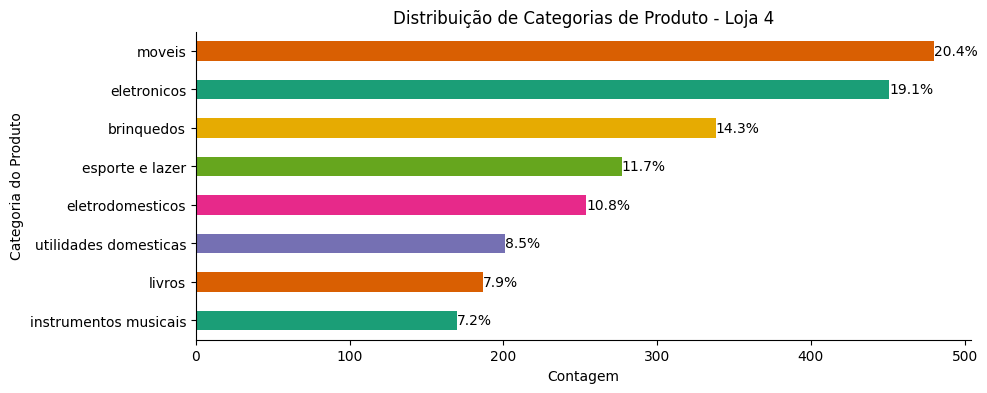

In [111]:
# @title Texto de título padrão
stores = {'Loja 1': loja, 'Loja 2': loja2, 'Loja 3': loja3, 'Loja 4': loja4}

for store_name, store_df in stores.items():
    print(f"Categorias de Produto - {store_name}")
    # Calculate the counts and sort them
    category_counts = store_df.groupby('Categoria do Produto').size().sort_values(ascending=True)

    # Calculate the percentages
    total_count = category_counts.sum()
    percentages = (category_counts / total_count) * 100

    # Create the horizontal bar plot
    ax = category_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), figsize=(10, len(category_counts) * 0.5))

    # Add percentages to the end of each bar
    for i, v in enumerate(category_counts):
        ax.text(v, i, f'{percentages.iloc[i]:.1f}%', va='center')

    plt.title(f'Distribuição de Categorias de Produto - {store_name}')
    plt.xlabel('Contagem')
    plt.ylabel('Categoria do Produto')
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

3.3 Avaliações dos Clientes
As avaliações médias dos clientes também são similares entre as lojas, com pequenas variações que não chegam a comprometer significativamente a imagem de nenhuma delas. A Loja 4 apresenta uma média um pouco inferior, mas ainda dentro de uma faixa aceitável.

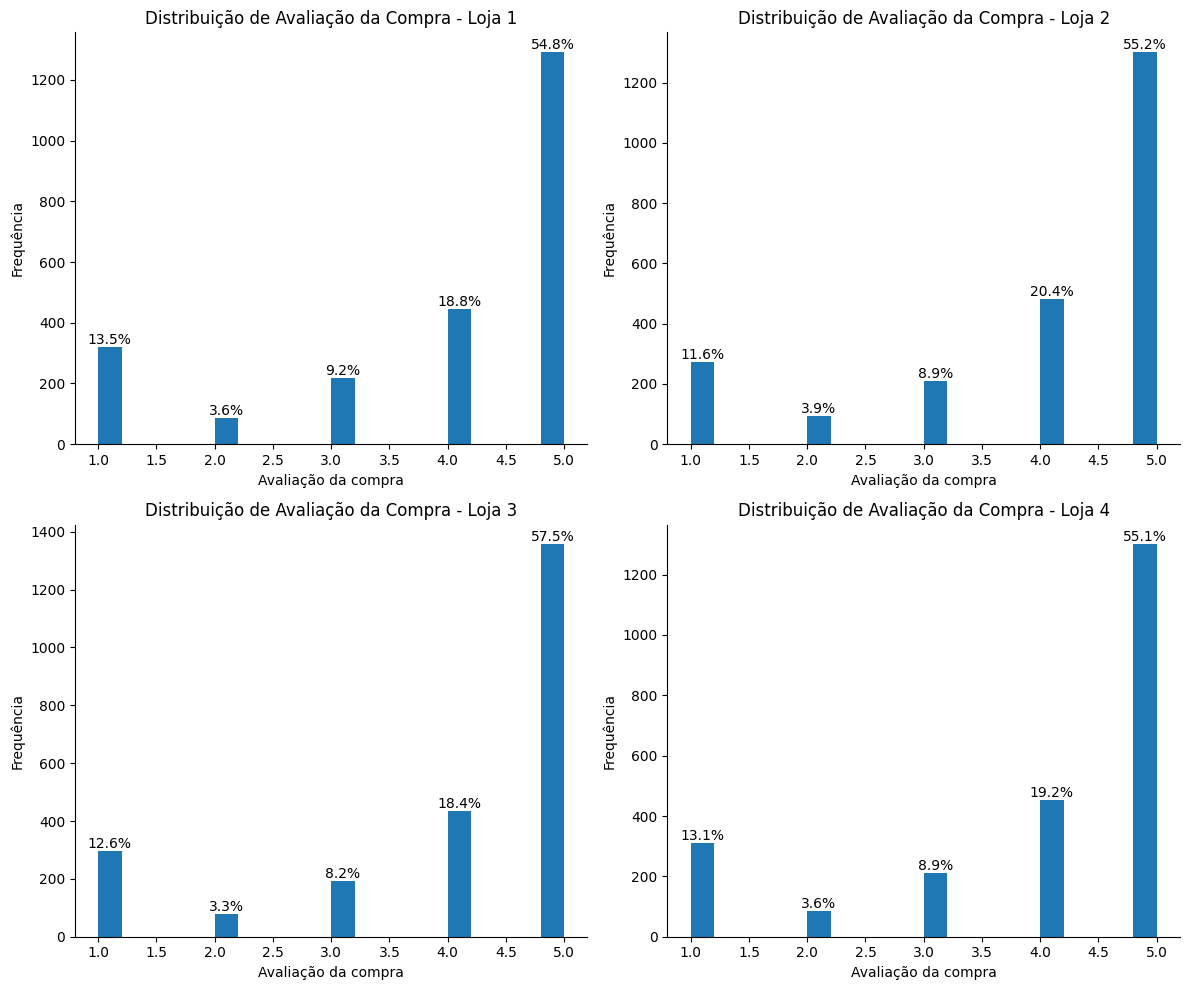

In [112]:
# @title Avaliações
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

stores = {'Loja 1': loja, 'Loja 2': loja2, 'Loja 3': loja3, 'Loja 4': loja4}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

for i, (store_name, store_df) in enumerate(stores.items()):
    ax = axes[i]
    # Calculate the counts and percentages for each bin
    counts, bins, patches = ax.hist(store_df['Avaliação da compra'], bins=20)
    total_count = counts.sum()
    percentages = (counts / total_count) * 100

    # Add percentages to the top of each bar where the count is greater than 0
    for patch, percentage, count in zip(patches, percentages, counts):
        if count > 0:
            height = patch.get_height()
            ax.text(patch.get_x() + patch.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom')

    ax.set_title(f'Distribuição de Avaliação da Compra - {store_name}')
    ax.set_xlabel('Avaliação da compra')
    ax.set_ylabel('Frequência')
    ax.spines[['top', 'right',]].set_visible(False)

plt.tight_layout()
plt.show()

3.4 Produtos Mais Vendidos
Assim como nas categorias, os produtos mais vendidos são praticamente os mesmos entre as lojas. A liderança nas vendas é ocupada por poucos itens que aparecem com frequência em todas as unidades. Portanto, o mix de produtos vendidos não explica o desempenho inferior da Loja 4.

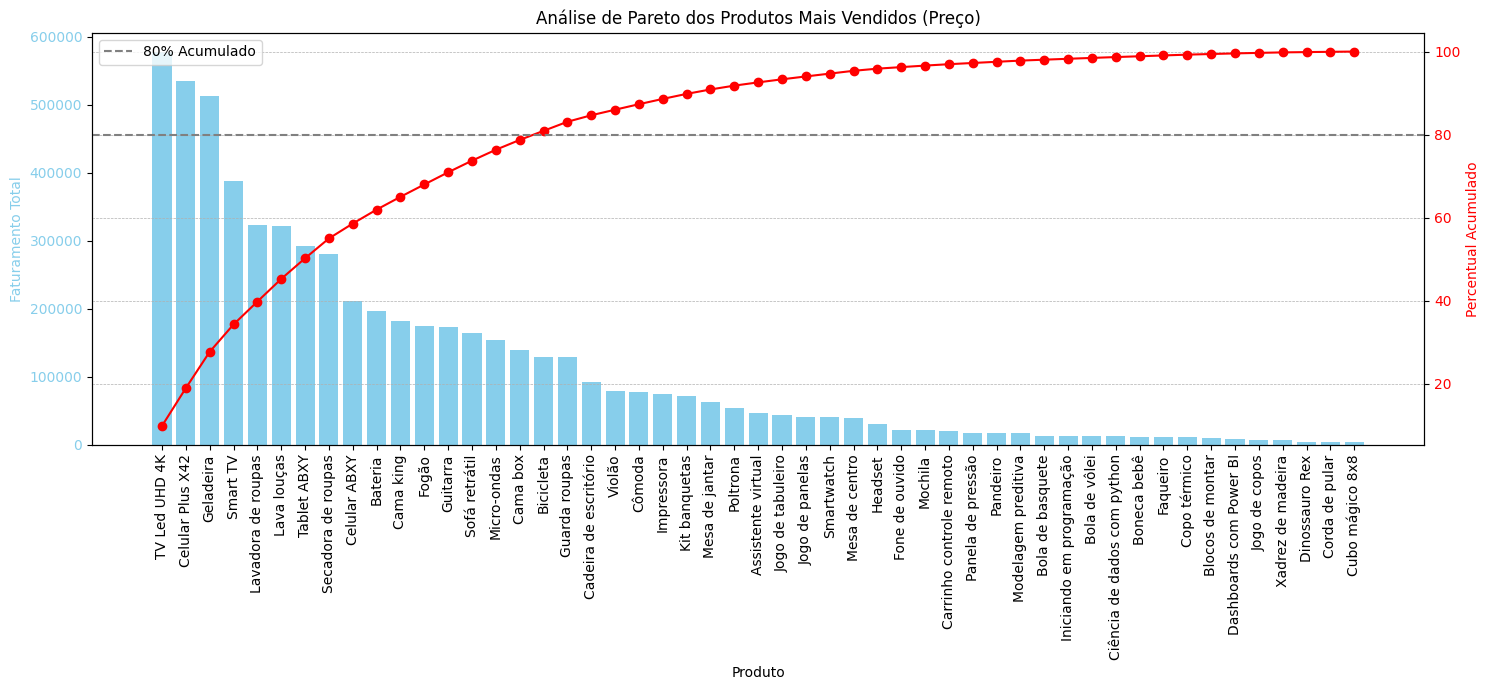


Produtos que representam aproximadamente 80% do faturamento total:
                        Sales  Percentage  Cumulative Percentage
Produto                                                         
TV Led UHD 4K       576652.70    9.821231               9.821231
Celular Plus X42    534735.14    9.107315              18.928546
Geladeira           513249.34    8.741380              27.669926
Smart TV            386963.12    6.590543              34.260469
Lavadora de roupas  323292.37    5.506138              39.766607
Lava louças         320715.58    5.462251              45.228858
Tablet ABXY         292016.76    4.973469              50.202327
Secadora de roupas  280317.31    4.774210              54.976537
Celular ABXY        210547.77    3.585934              58.562471
Bateria             197074.45    3.356464              61.918935
Cama king           181040.36    3.083380              65.002314
Fogão               174495.19    2.971906              67.974220
Guitarra            17

,Sales,Percentage,Cumulative Percentage
Produto,,,
Bicicleta,128648.29,2.191067,80.894698
Guarda roupas,128328.09,2.185613,83.080312
Cadeira de escritório,92132.31,1.569147,84.649459
Violão,78530.63,1.337490,85.986949
Cômoda,77892.33,1.326619,87.313568
Impressora,74969.03,1.276831,88.590400
Kit banquetas,71045.78,1.210013,89.800412
Mesa de jantar,62420.90,1.063118,90.863531
Poltrona,54395.35,0.926432,91.789962


In [113]:
# @title Pareto dos itens vendidos
# Calculate the total sales per product across all stores
product_sales = lojas.groupby('Produto')['Preço'].sum().sort_values(ascending=False)

# Calculate the cumulative sum and total sum for Pareto analysis
cumulative_sales = product_sales.cumsum()
total_sales = product_sales.sum()

# Calculate the percentage of total sales for each product and cumulative percentage
percentage_of_total = (product_sales / total_sales) * 100
cumulative_percentage = (cumulative_sales / total_sales) * 100

# Create a DataFrame for plotting
pareto_df = pd.DataFrame({'Sales': product_sales,
                          'Percentage': percentage_of_total,
                          'Cumulative Percentage': cumulative_percentage})

# Find the index where the cumulative percentage reaches approximately 80%
pareto_80_index = pareto_df[pareto_df['Cumulative Percentage'] <= 80].index
pareto_20_index = pareto_df[pareto_df['Cumulative Percentage'] > 80].index

# Plotting the Pareto chart
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar plot for individual product sales
ax1.bar(pareto_df.index, pareto_df['Sales'], color='skyblue')
ax1.set_xlabel('Produto')
ax1.set_ylabel('Faturamento Total', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=90)

# Create a secondary y-axis for the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(pareto_df.index, pareto_df['Cumulative Percentage'], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Percentual Acumulado', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a line at 80% cumulative percentage
ax2.axhline(y=80, color='gray', linestyle='--', label='80% Acumulado')
ax2.legend()

plt.title('Análise de Pareto dos Produtos Mais Vendidos (Preço)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add shaded area for the 80% products (optional, can make the plot busy)
# ax1.fill_between(pareto_df.index, pareto_df['Sales'], color='skyblue', alpha=0.3, where=[x in pareto_80_index for x in pareto_df.index])

# Improve layout and display the plot
plt.tight_layout()
plt.show()

# Display the products that make up the top 80% of revenue
print("\nProdutos que representam aproximadamente 80% do faturamento total:")
print(pareto_df.loc[pareto_80_index])

print("\nProdutos que representam aproximadamente 20% do faturamento total:")
pareto_df.loc[pareto_20_index]

3.5 Frete Médio
A Loja 4 apresenta um frete médio ligeiramente inferior, o que teoricamente poderia aumentar sua margem de lucro. No entanto, mesmo com esse pequeno benefício logístico, a loja ainda apresenta o pior desempenho financeiro. Isso indica que o problema pode estar no volume de vendas ou no tíquete médio — e não nos custos de frete.

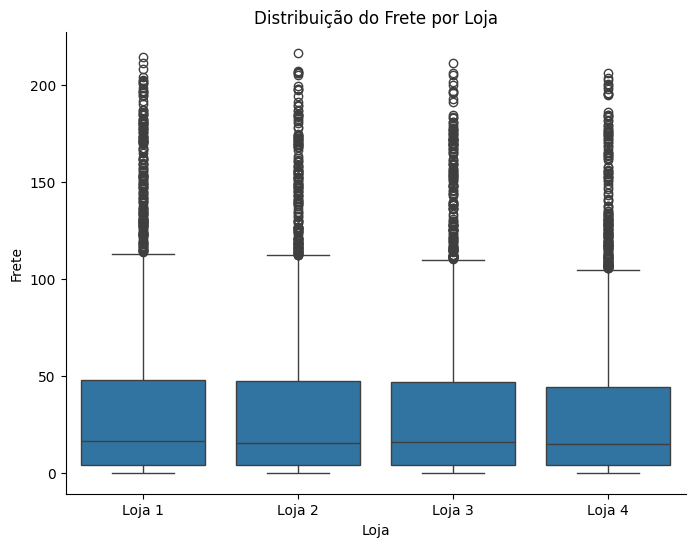

In [114]:
# @title Boxplot do Frete Médio
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loja', y='Frete', data=lojas)
plt.title('Distribuição do Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

---

## 4. Recomendação Final

Com base nos dados analisados, a recomendação é que o cliente João **considere a venda da Loja 4**.

Essa decisão se justifica por:

* Ser a loja com o **menor lucro acumulado** ao longo dos quatro anos;
* Apresentar **baixa performance anual de forma recorrente**;
* Não demonstrar **vantagens significativas nas demais variáveis analisadas** (categorias vendidas, avaliações, produtos, frete).

Dado que as outras lojas apresentam desempenho financeiro superior e que não há diferenças substanciais em termos de operação ou percepção do cliente, a **Loja 4 se mostra a unidade menos estratégica para manter** no portfólio.

A recomendação considera como principal critério a **KPI de maior relevância: o lucro operacional** — métrica fundamental para sustentar o crescimento e a lucratividade da operação como um todo.

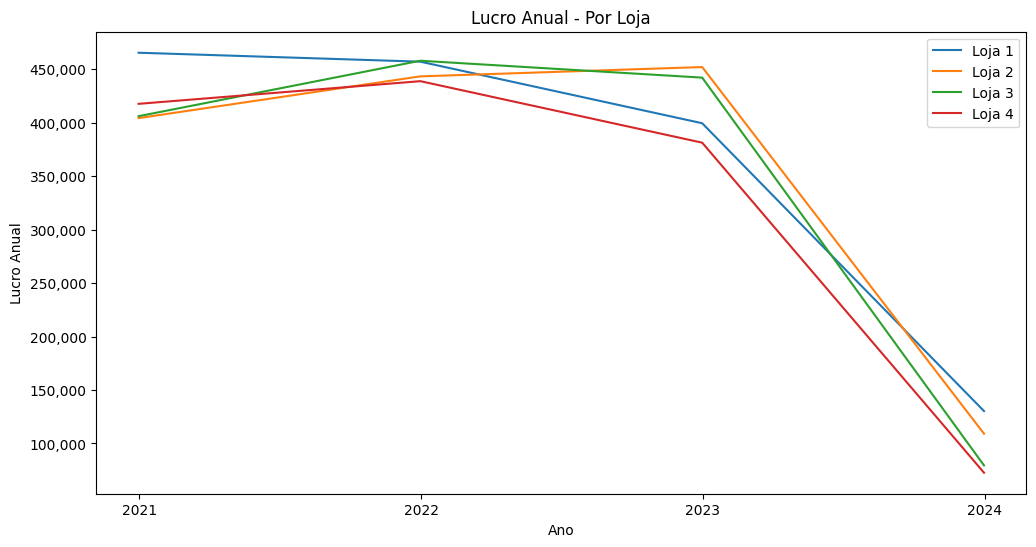

In [116]:
# @title Lucro Anual
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

# Lista com os DataFrames das lojas
lojas_list = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(12, 6))

for i, df in enumerate(lojas_list):
    df = df.copy()
    df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], format='%d/%m/%Y')
    df['Preco - Frete'] = df['Preço'] - df['Frete']

    # Agrupar por ano e calcular somatório
    df_anual = df.resample('YE', on='Data da Compra')['Preco - Frete'].sum()

    plt.plot(df_anual.index, df_anual.values, label=nomes_lojas[i])

plt.xlabel('Ano')
plt.ylabel('Lucro Anual')
plt.title('Lucro Anual - Por Loja')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()